In [22]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%cd ..

/home/matier/projects/python/ltl2action


/home/matier/miniconda3/envs/deepltl/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [23]:
def smooth(row, radius):
    """
    Computes the moving average over the given row of data. Returns an array of the same shape as the original row.
    """
    y = np.ones(radius)
    z = np.ones(len(row))
    return np.convolve(row, y, 'same') / np.convolve(z, y, 'same')

In [36]:
def process_logs(experiment):
    df = pd.read_csv(f'storage/{experiment}/train/log.csv')
    df['alg'] = experiment
    df['smooth'] = smooth(df['return_mean'], 100)
    return df

In [43]:
df = pd.concat([process_logs(exp) for exp in ['emb', 'tanhenv', 'emb_point']])
# df['return_smooth'] = smooth(df['return_mean'], 10)


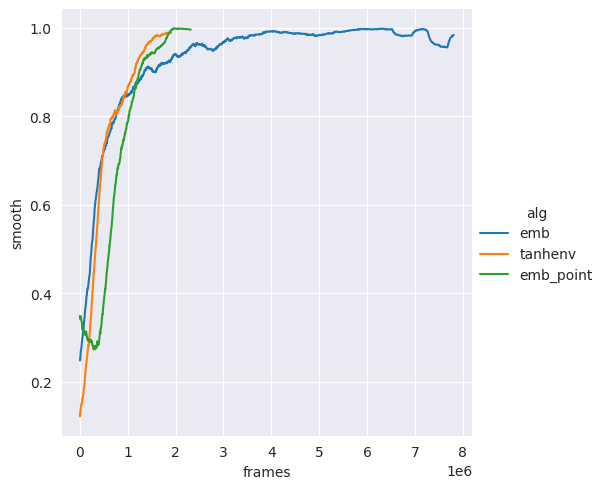

In [44]:
sns.relplot(df, x='frames', y='smooth', kind='line', hue='alg')

In [60]:
df

,update,frames,FPS,duration,rreturn_mean,rreturn_std,rreturn_min,rreturn_max,average_reward_per_step,average_discounted_return,...,value,policy_loss,value_loss,grad_norm,return_mean,return_std,return_min,return_max,alg,smooth
0,1,4096,271.838191,15,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,-0.056516,-0.008010,0.009382,0.096204,0.000000,0.000000,0.0,0.0,emb,0.040000
1,2,8192,328.903193,27,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,-0.053113,-0.003815,0.000844,0.039002,0.000000,0.000000,0.0,0.0,emb,0.128571
2,3,12288,299.067777,41,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,-0.049782,-0.003479,0.000511,0.019393,0.000000,0.000000,0.0,0.0,emb,0.134014
3,4,16384,438.885612,50,0.200000,0.400000,0.0,1.0,0.000556,0.097475,...,-0.050437,-0.008842,0.002607,0.024859,0.200000,0.400000,0.0,1.0,emb,0.117262
4,5,20480,435.812646,59,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,-0.039386,-0.002556,0.000393,0.015176,0.000000,0.000000,0.0,0.0,emb,0.132011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,457,1871872,208.660651,7676,0.937500,0.242061,0.0,1.0,0.006177,0.643094,...,0.753627,0.013158,0.001976,0.039140,0.937500,0.242061,0.0,1.0,tanhenv,0.979104
457,458,1875968,135.150305,7706,1.000000,0.000000,1.0,1.0,0.008849,0.752642,...,0.819568,-0.004570,0.000828,0.041220,1.000000,0.000000,1.0,1.0,tanhenv,0.981832
458,459,1880064,140.095416,7735,1.000000,0.000000,1.0,1.0,0.008535,0.747825,...,0.823428,0.000083,0.001007,0.025310,1.000000,0.000000,1.0,1.0,tanhenv,0.979561
459,460,1884160,179.915043,7758,1.000000,0.000000,1.0,1.0,0.007188,0.681144,...,0.776358,0.006719,0.001158,0.022482,1.000000,0.000000,1.0,1.0,tanhenv,0.984578


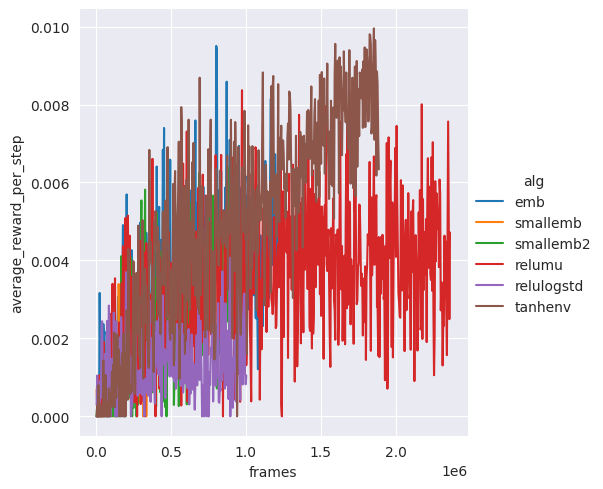

In [61]:
sns.relplot(df, x='frames', y='average_reward_per_step', kind='line', hue='alg')

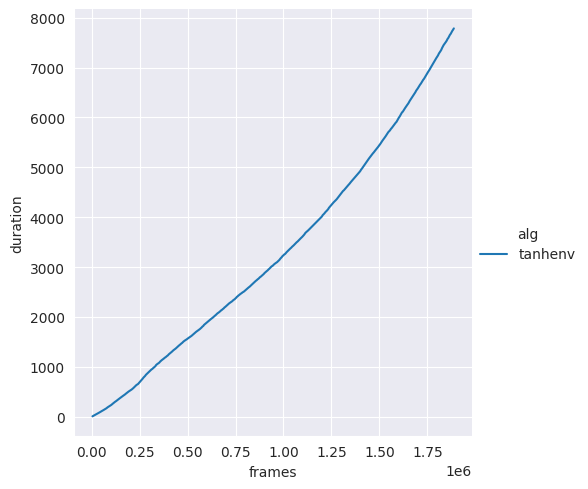

In [56]:
sns.relplot(df[df['alg'] =='tanhenv'], x='frames', y='duration', kind='line', hue='alg')